In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# lets import the dataset
dataset = pd.read_csv('concrete_data.csv')


In [3]:
dataset.head()


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
dataset.describe() #describe numerical dataset

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# shape of the dataset
dataset.shape

(1030, 9)

In [6]:
# lets check the missing values
dataset.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [7]:
# lets work on Numerical values
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
# lets check how many unique values each features have in it
for feature in dataset.columns:
 print(feature,':',len(dataset[feature].unique()))

cement : 278
blast_furnace_slag : 185
fly_ash : 156
water : 195
superplasticizer : 111
coarse_aggregate : 284
fine_aggregate  : 302
age : 14
concrete_compressive_strength : 845


In [9]:
# so lets create list of discrete feature and the plot some graphs
discrete_features = [feature for feature in dataset.columns if feature == 'age']

In [10]:
discrete_features

['age']

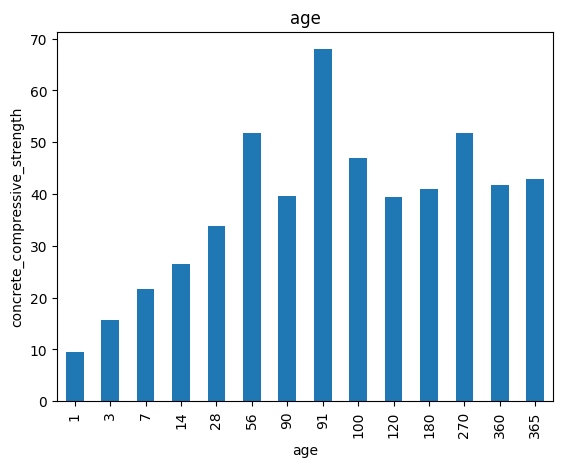

In [11]:
# lets find realtionship between discrete feature and concrete_compressive_strength
data = dataset.copy()
for feature in discrete_features:
 data.groupby(feature)['concrete_compressive_strength'].median().plot.bar()
 plt.xlabel(feature)
 plt.ylabel('concrete_compressive_strength')
 plt.title(feature)
 plt.show()

In [12]:
# now lets create the list of continuous variables
continuous_features = [feature for feature in dataset.columns if feature not in discrete_features]

In [13]:
continuous_features

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'concrete_compressive_strength']

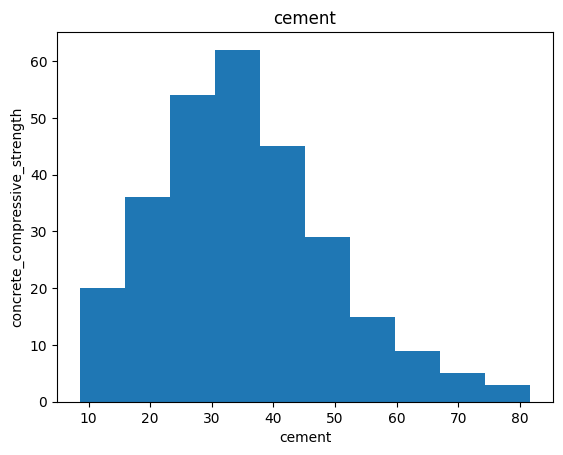

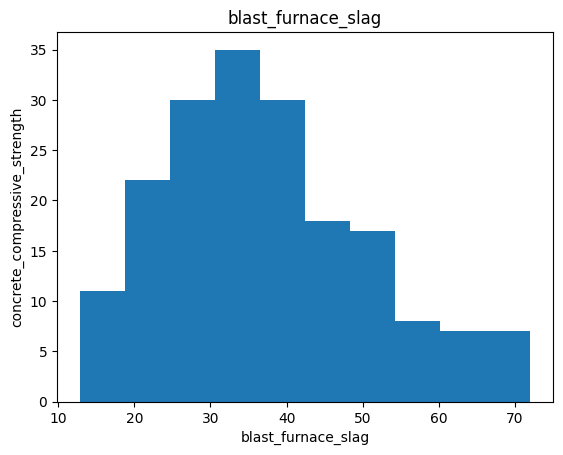

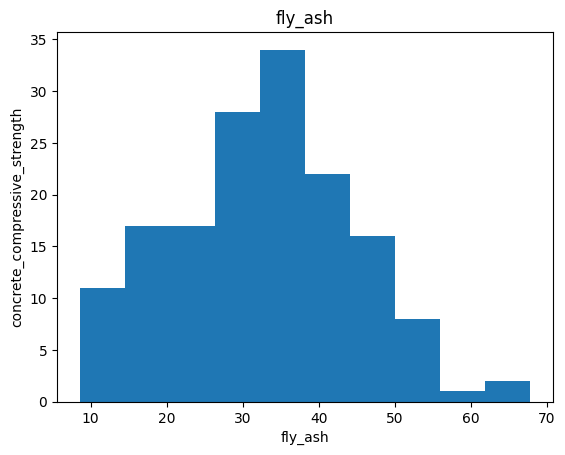

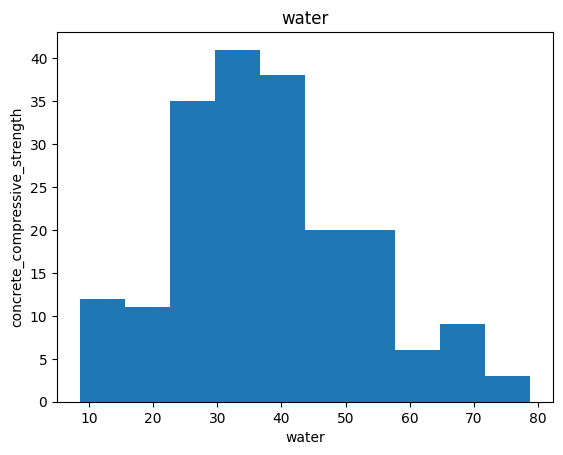

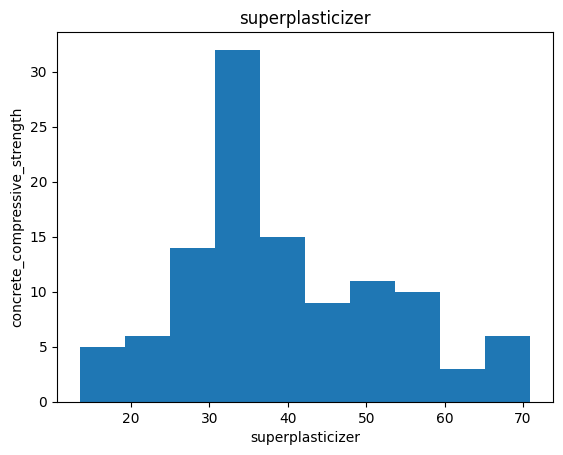

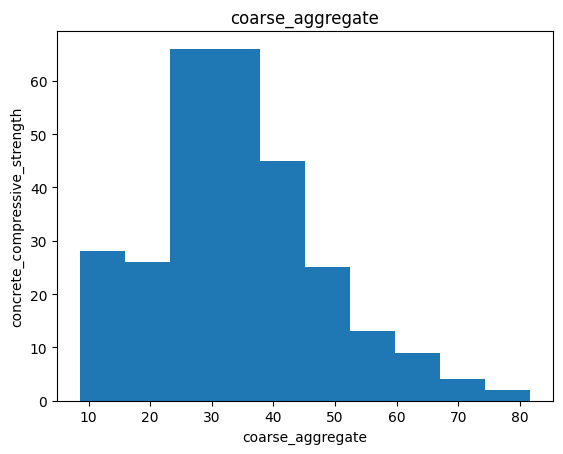

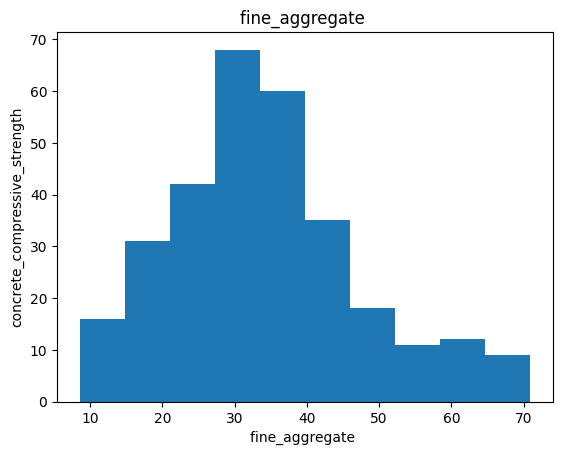

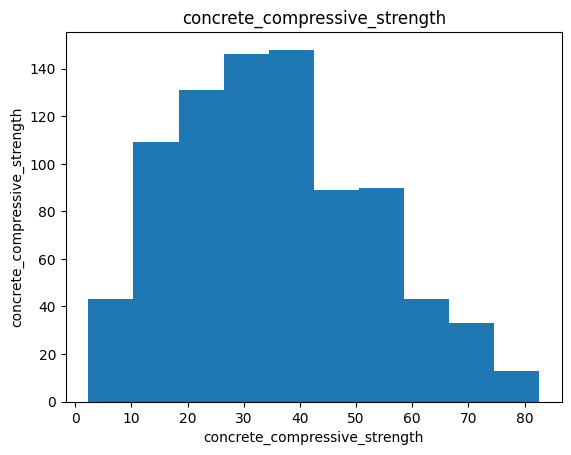

In [14]:
# lets find realtionship between continuous feature and concrete_compressive_strength
data = dataset.copy()
for feature in continuous_features:
 data.groupby(feature)['concrete_compressive_strength'].median().plot.hist()
 plt.xlabel(feature)
 plt.ylabel('concrete_compressive_strength')
 plt.title(feature)
 plt.show()

In [15]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,-1]

In [16]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [17]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: concrete_compressive_strength, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [20]:
X_train.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3
246,238.1,0.0,94.1,186.7,7.0,949.9,847.0,28
277,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56
887,326.0,0.0,138.0,199.0,11.0,801.0,792.0,28
208,212.1,0.0,121.6,180.3,5.7,1057.6,779.3,100


In [21]:
y_train

76      40.20
246     30.23
277     36.97
887     40.68
208     39.61
        ...  
320     28.68
707     43.25
72      33.40
318     45.37
1027    23.70
Name: concrete_compressive_strength, Length: 824, dtype: float64

In [22]:
X_test.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
589,339.2,0.0,0.0,185.7,0.0,1069.2,754.3,28
298,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,100
586,381.4,0.0,0.0,185.7,0.0,1104.6,784.3,7
195,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,14
493,387.0,20.0,94.0,157.0,11.6,938.0,845.0,7


In [23]:
y_test

589    31.90
298    48.15
586    14.54
195    24.99
493    41.67
       ...  
66     44.70
656    11.41
732     9.01
638    38.21
95     49.20
Name: concrete_compressive_strength, Length: 206, dtype: float64

In [24]:
# Now applying different regression techniques to find the best accuracy

### Linear Regresssion

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [26]:
linear_predict = linear.predict(X_test)


In [27]:
linear_predict

array([27.38136587, 38.72284204, 30.67903582, 23.97432817, 47.81579404,
       35.77338835, 25.72405762, 52.76987728, 35.18841243, 33.42278787,
       53.91519649, 61.21431615, 24.11358873, 49.70875716, 31.88410938,
       60.3129897 , 26.59060294, 21.39980144, 30.75317499, 72.03132211,
       17.84980838, 23.6561113 , 40.6756793 , 24.25544746, 45.98516388,
       23.78327551, 10.21474729, 26.9625667 , 28.67181688, 58.92719698,
       23.15432062, 23.44578262, 38.40494318, 22.82241337, 44.60588942,
       47.57695898, 16.48169681, 20.27267468, 24.24772999, 37.07963814,
       33.32964134, 49.36564998, 25.79095277, 22.62269545, 31.47556643,
       48.08101135, 24.69246579, 33.41779699, 35.9362256 , 34.48713682,
       17.46957441, 25.12465743, 59.9328835 , 40.54147857, 55.72869529,
       36.91381517, 25.89559723, 39.01217594, 33.72978189, 18.0434019 ,
       71.94873015, 50.43579614, 32.18445947, 32.54979614, 23.1970394 ,
       47.75558043, 27.96572752, 13.51315741, 30.28003933, 23.86

In [28]:
from sklearn.metrics import r2_score
linear_score = r2_score(y_test,linear_predict)
print("Accuracy score for Linear Regression: ",linear_score*100)

Accuracy score for Linear Regression:  57.2431195105733


### Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [30]:
ridge_predict = ridge.predict(X_test)

In [31]:
ridge_predict

array([27.38140121, 38.72277665, 30.67904368, 23.97432506, 47.81581092,
       35.77366675, 25.72402677, 52.76966143, 35.18841311, 33.42283985,
       53.91519737, 61.21429981, 24.1136049 , 49.70878272, 31.88405894,
       60.31277835, 26.59067648, 21.39981631, 30.75306465, 72.03099611,
       17.84984058, 23.6560151 , 40.67577781, 24.25549763, 45.98543952,
       23.78330085, 10.21477017, 26.9627452 , 28.67177826, 58.92718194,
       23.15428448, 23.44583103, 38.40496492, 22.8224357 , 44.60596729,
       47.577063  , 16.48172025, 20.27268646, 24.24777157, 37.07962004,
       33.32959167, 49.36559882, 25.7909743 , 22.6227671 , 31.47558062,
       48.08119664, 24.69244793, 33.41782008, 35.93611871, 34.48715847,
       17.46962783, 25.12463836, 59.932838  , 40.54156728, 55.72853542,
       36.91394877, 25.89555132, 39.01229453, 33.7297656 , 18.04335785,
       71.94870966, 50.43587695, 32.18447765, 32.54983311, 23.19699186,
       47.75569197, 27.96580594, 13.51318165, 30.27995737, 23.86

In [32]:
ridge_score = r2_score(y_test,ridge_predict)
print("Accuracy score for Ridge Regression: ",ridge_score*100)

Accuracy score for Ridge Regression:  57.243121933811466


### Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [34]:
lasso_predict = lasso.predict(X_test)

In [35]:
lasso_predict

array([27.5346654 , 38.48796845, 30.54176182, 23.90913714, 47.7354967 ,
       36.7020226 , 25.59295345, 52.29604722, 35.31195622, 33.60794263,
       53.92958313, 61.0445642 , 23.97496053, 49.65196815, 31.78971585,
       59.73263042, 26.73342722, 21.47367378, 30.39134388, 71.16630615,
       17.9761412 , 23.48588312, 40.8328628 , 24.41162155, 46.86893968,
       23.88758315, 10.32847718, 27.37151107, 28.71862827, 58.92786825,
       23.10634579, 23.52066409, 38.4197575 , 22.85812564, 44.81164852,
       47.73921825, 16.58248084, 20.3781175 , 24.33894046, 36.99967237,
       33.20528384, 49.15053776, 25.81362479, 22.86779346, 31.30459842,
       48.42927171, 24.57986679, 33.45451893, 35.5638076 , 34.57868041,
       17.53851783, 25.02662261, 59.8047591 , 40.64400302, 55.28414562,
       37.2888064 , 25.72361532, 39.27650411, 33.5695709 , 18.00018247,
       71.93921484, 50.55784941, 32.27916567, 32.71012455, 23.11564699,
       48.08029384, 28.24414793, 13.62698169, 30.02474525, 24.02

In [36]:
lasso_score = r2_score(y_test,lasso_predict)
print('Accuracy score for Lasso Regression: ',lasso_score*100)

Accuracy score for Lasso Regression:  57.18279896892429


### Elastic Net

In [37]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train,y_train)

ElasticNet()

In [38]:
elastic_predict = elastic.predict(X_test)

In [39]:
elastic_predict

array([27.47009625, 38.58193806, 30.61662831, 23.94153094, 47.78206271,
       36.32482325, 25.6498558 , 52.45686491, 35.24848261, 33.53189303,
       53.92104482, 61.12371146, 24.05308125, 49.68867479, 31.82072171,
       59.9490584 , 26.68769464, 21.44234417, 30.53600976, 71.48604016,
       17.92496529, 23.5374472 , 40.78694754, 24.35134805, 46.51268747,
       23.84452052, 10.28095695, 27.22720414, 28.68291086, 58.92181784,
       23.1186498 , 23.50032575, 38.41822472, 22.85017614, 44.73508209,
       47.69561137, 16.54120342, 20.33096678, 24.30925807, 37.0327637 ,
       33.2513817 , 49.24056467, 25.81176458, 22.7697423 , 31.39782057,
       48.31854151, 24.63125508, 33.44275615, 35.71465595, 34.53881204,
       17.52562421, 25.0702686 , 59.85262289, 40.62324068, 55.44996086,
       37.14644976, 25.79589211, 39.18489645, 33.64651053, 18.00752511,
       71.93555486, 50.52355702, 32.23885131, 32.64012667, 23.14088419,
       47.95423879, 28.13165307, 13.57961499, 30.12438339, 23.96

In [40]:
elastic_score = r2_score(y_test,elastic_predict)
print("Accuracy Score for Elastic Net Regression: ",elastic_score*100)

Accuracy Score for Elastic Net Regression:  57.217907724088946
